In [4]:
def plot_figures_loss_eigs(train_graphs, lr):
    cur_epochs = train_graphs.log_epochs
    plt.figure(figsize=(15,5))
    plt.subplot(2,5,1)
    plt.semilogy(cur_epochs, train_graphs.eigs)
    plt.semilogy(cur_epochs, train_graphs.eigs_test)
    plt.semilogy(cur_epochs, np.ones_like(cur_epochs) * 2 / lr)
    plt.legend(['Train','Test'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Eigenvalues')

    plt.subplot(2,5,2)
    plt.semilogy(cur_epochs, train_graphs.loss)
    #plt.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Loss')

    plt.subplot(2,5,3)
    plt.plot(cur_epochs, train_graphs.accuracy)
    #.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Accuracy')

    plt.subplot(2,5,4)
    plt.semilogy(cur_epochs, train_graphs.test_loss)
    #plt.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Testing Loss')

    plt.subplot(2,5,5)
    plt.plot(cur_epochs, train_graphs.test_accuracy)
    #.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Testing Accuracy')

    plt.tight_layout()
    plt.show()



def get_directory(lr, dataset_name, opt_name, weight_decay, batch_size, epochs):
    results_dir = "results"
    directory = f"{results_dir}/{dataset_name}/{opt_name}/lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/epoch_{epochs}"
    return directory

In [5]:
def plot_figures_nc_train(train_graphs, lr):
    cur_epochs = train_graphs.log_epochs
    plt.figure(figsize=(15,5))
    plt.subplot(2,5,1)
    plt.semilogy(cur_epochs, train_graphs.eigs)
    plt.semilogy(cur_epochs, np.ones_like(cur_epochs) * 2 / lr)
    plt.legend(['Eigenvalues'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Eigenvalues')

    plt.subplot(2,5,2)
    plt.semilogy(cur_epochs, train_graphs.reg_loss)
    plt.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Loss')

    plt.subplot(2,5,3)
    plt.plot(cur_epochs, 100*(1 - np.array(train_graphs.accuracy)))
    plt.xlabel('Epoch')
    plt.ylabel('Training Error (%)')
    plt.title('Training Error')

    plt.subplot(2,5,4)
    plt.semilogy(cur_epochs, train_graphs.Sw_invSb)
    plt.xlabel('Epoch')
    plt.ylabel('Tr{Sw Sb^-1}')
    plt.title('NC1: Activation Collapse')

    plt.subplot(2,5,5)
    plt.plot(cur_epochs, train_graphs.norm_M_CoV)
    plt.plot(cur_epochs, train_graphs.norm_W_CoV)
    plt.legend(['Class Means','Classifiers'])
    plt.xlabel('Epoch')
    plt.ylabel('Std/Avg of Norms')
    plt.title('NC2: Equinorm')

    plt.subplot(2,5,6)
    plt.plot(cur_epochs, train_graphs.cos_M)
    plt.plot(cur_epochs, train_graphs.cos_W)
    plt.legend(['Class Means','Classifiers'])
    plt.xlabel('Epoch')
    plt.ylabel('Avg|Cos + 1/(C-1)|')
    plt.title('NC2: Maximal Equiangularity')

    plt.subplot(2,5,7)
    plt.plot(cur_epochs,train_graphs.W_M_dist)
    plt.xlabel('Epoch')
    plt.ylabel('||W^T - H||^2')
    plt.title('NC3: Self Duality')

    plt.subplot(2,5,8)
    plt.plot(cur_epochs,train_graphs.NCC_mismatch)
    plt.xlabel('Epoch')
    plt.ylabel('Proportion Mismatch from NCC')
    plt.title('NC4: Convergence to NCC')

    # Plot decomposition of MSE loss
    if loss_name == 'MSELoss':
        plt.subplot(2,5,9)
        plt.semilogy(cur_epochs, train_graphs.MSE_wd_features)
        plt.semilogy(cur_epochs, train_graphs.LNC1)
        plt.semilogy(cur_epochs, train_graphs.LNC23)
        plt.semilogy(cur_epochs, train_graphs.Lperp)
        plt.legend(['MSE+wd', 'LNC1', 'LNC2/3', 'Lperp'], fontsize="5")
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Decomposition of MSE')

    plt.tight_layout()
    plt.show()

In [6]:
def plot_figures_nc_test(train_graphs, lr):
    cur_epochs = train_graphs.log_epochs
    plt.figure(figsize=(15,5))
    plt.subplot(2,5,1)
    plt.semilogy(cur_epochs, train_graphs.eigs_test)
    plt.semilogy(cur_epochs, np.ones_like(cur_epochs) * 2 / lr)
    plt.legend(['Eigenvalues'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Eigenvalues')

    plt.subplot(2,5,2)
    plt.semilogy(cur_epochs, train_graphs.test_reg_loss)
    plt.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Testing Loss')

    plt.subplot(2,5,3)
    plt.plot(cur_epochs, 100*(1 - np.array(train_graphs.test_accuracy)))
    plt.xlabel('Epoch')
    plt.ylabel('Training Error (%)')
    plt.title('Testing Error')

    plt.subplot(2,5,4)
    plt.semilogy(cur_epochs, train_graphs.test_Sw_invSb)
    plt.xlabel('Epoch')
    plt.ylabel('Tr{Sw Sb^-1}')
    plt.title('NC1: Activation Collapse')

    plt.subplot(2,5,5)
    plt.plot(cur_epochs, train_graphs.test_norm_M_CoV)
    plt.plot(cur_epochs, train_graphs.test_norm_W_CoV)
    plt.legend(['Class Means','Classifiers'])
    plt.xlabel('Epoch')
    plt.ylabel('Std/Avg of Norms')
    plt.title('NC2: Equinorm')

    plt.subplot(2,5,6)
    plt.plot(cur_epochs, train_graphs.test_cos_M)
    plt.plot(cur_epochs, train_graphs.test_cos_W)
    plt.legend(['Class Means','Classifiers'])
    plt.xlabel('Epoch')
    plt.ylabel('Avg|Cos + 1/(C-1)|')
    plt.title('NC2: Maximal Equiangularity')

    plt.subplot(2,5,7)
    plt.plot(cur_epochs,train_graphs.test_W_M_dist)
    plt.xlabel('Epoch')
    plt.ylabel('||W^T - H||^2')
    plt.title('NC3: Self Duality')

    plt.subplot(2,5,8)
    plt.plot(cur_epochs,train_graphs.test_NCC_mismatch)
    plt.xlabel('Epoch')
    plt.ylabel('Proportion Mismatch from NCC')
    plt.title('NC4: Convergence to NCC')

    # Plot decomposition of MSE loss
    if loss_name == 'MSELoss':
        plt.subplot(2,5,9)
        plt.semilogy(cur_epochs, train_graphs.test_MSE_wd_features)
        plt.semilogy(cur_epochs, train_graphs.test_LNC1)
        plt.semilogy(cur_epochs, train_graphs.test_LNC23)
        plt.semilogy(cur_epochs, train_graphs.test_Lperp)
        plt.legend(['MSE+wd', 'LNC1', 'LNC2/3', 'Lperp'], fontsize="5")
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Decomposition of MSE')

    plt.tight_layout()
    plt.show()

In [2]:
from main import graphs
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

loss_name = 'MSELoss'

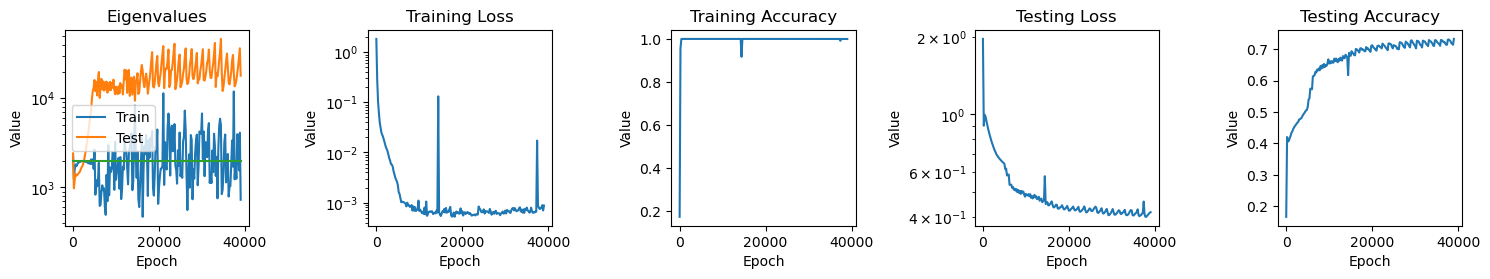

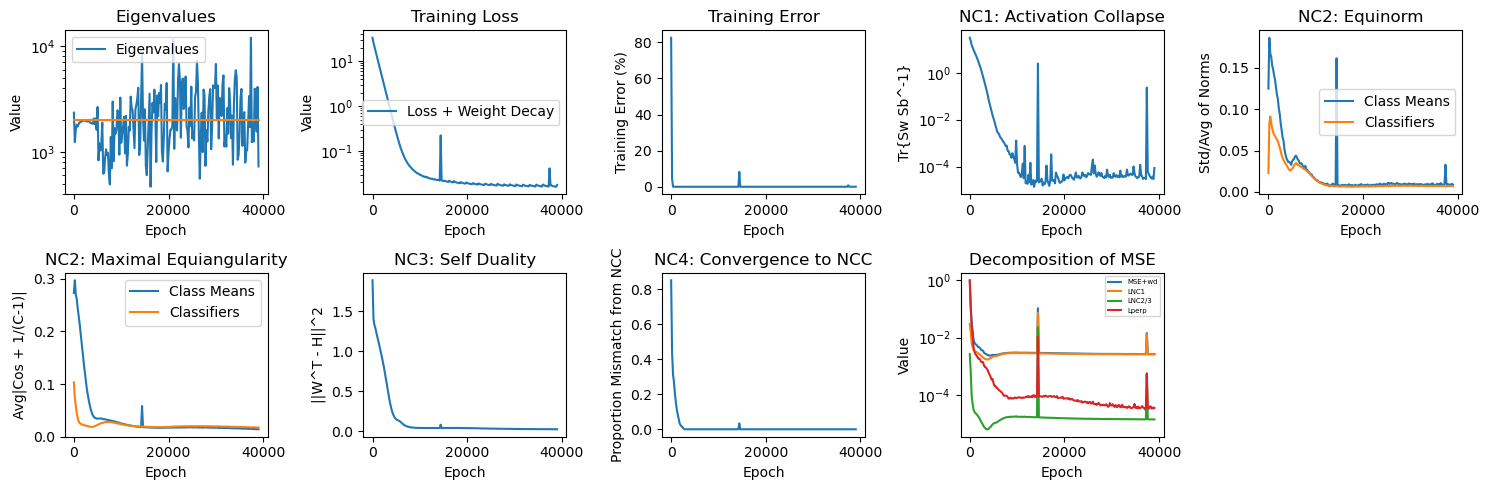

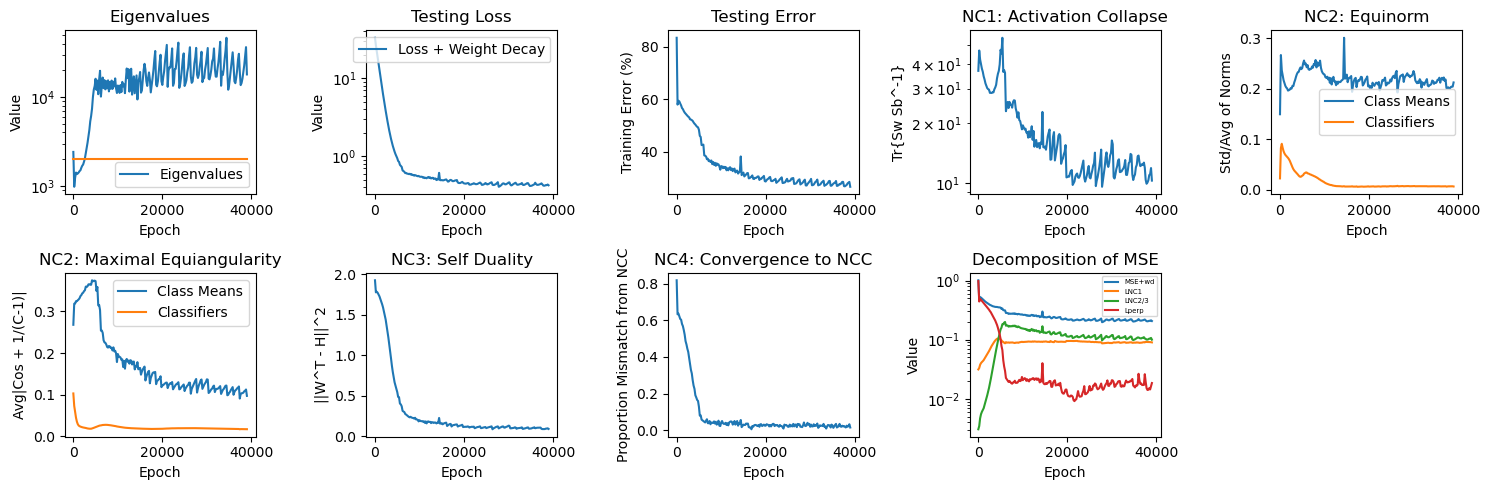

In [7]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.001, "cifar", "sgd", 0.005, 512, 40000 

directory = get_directory(lr, dataset_name, opt_name, weight_decay, batch_size, epochs)
with open(f'{directory}/train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures_loss_eigs(train_graphs, lr)
plot_figures_nc_train(train_graphs, lr)
plot_figures_nc_test(train_graphs, lr)

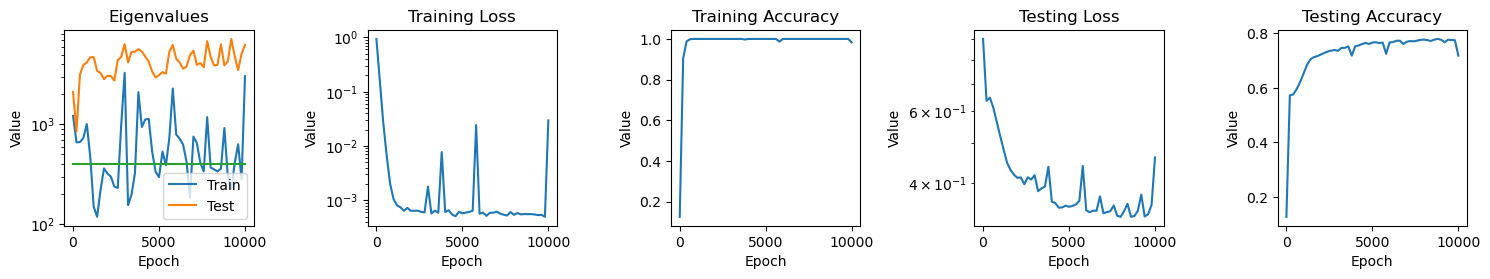

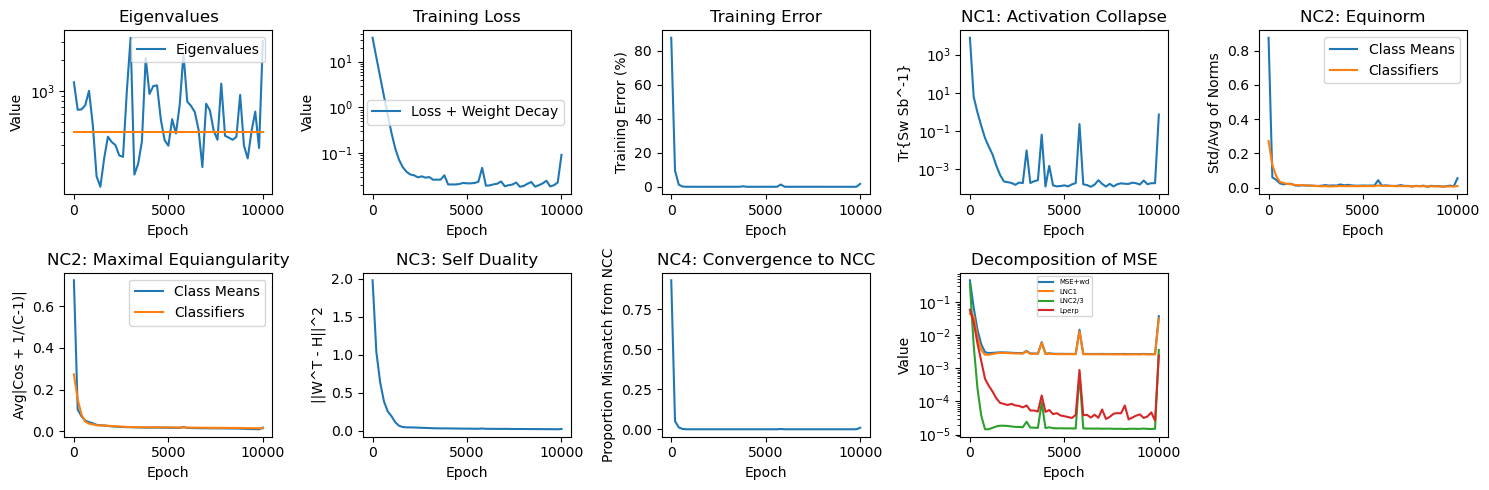

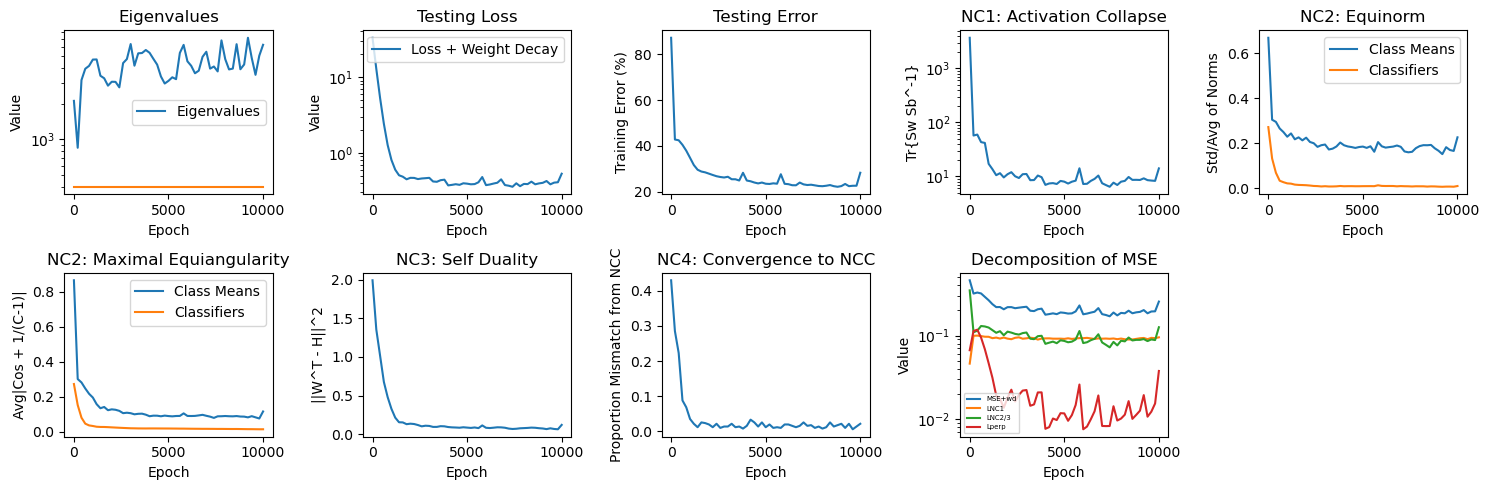

In [8]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.005, "cifar", "sgd", 0.005, 512, 10000 

directory = get_directory(lr, dataset_name, opt_name, weight_decay, batch_size, epochs)
with open(f'{directory}/train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures_loss_eigs(train_graphs, lr)
plot_figures_nc_train(train_graphs, lr)
plot_figures_nc_test(train_graphs, lr)

In [38]:
train_graphs.test_accuracy[-10:]

[0.7745, 0.7715, 0.7764, 0.779, 0.776, 0.7667, 0.7763, 0.7746, 0.7744, 0.7176]

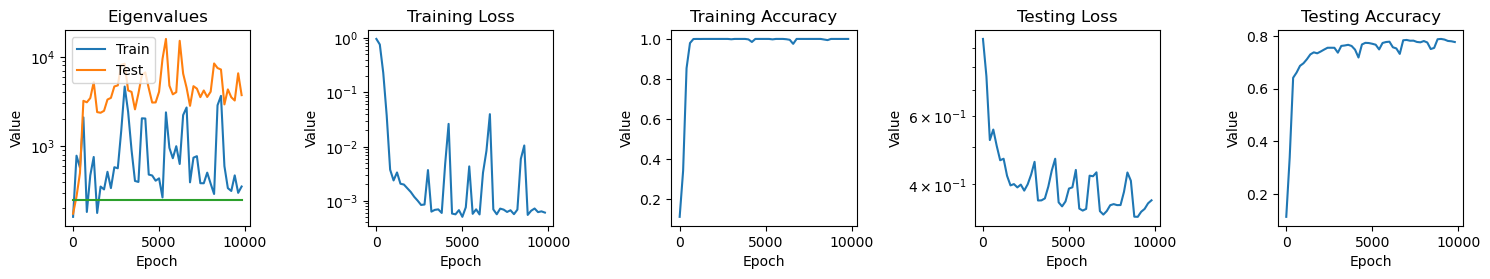

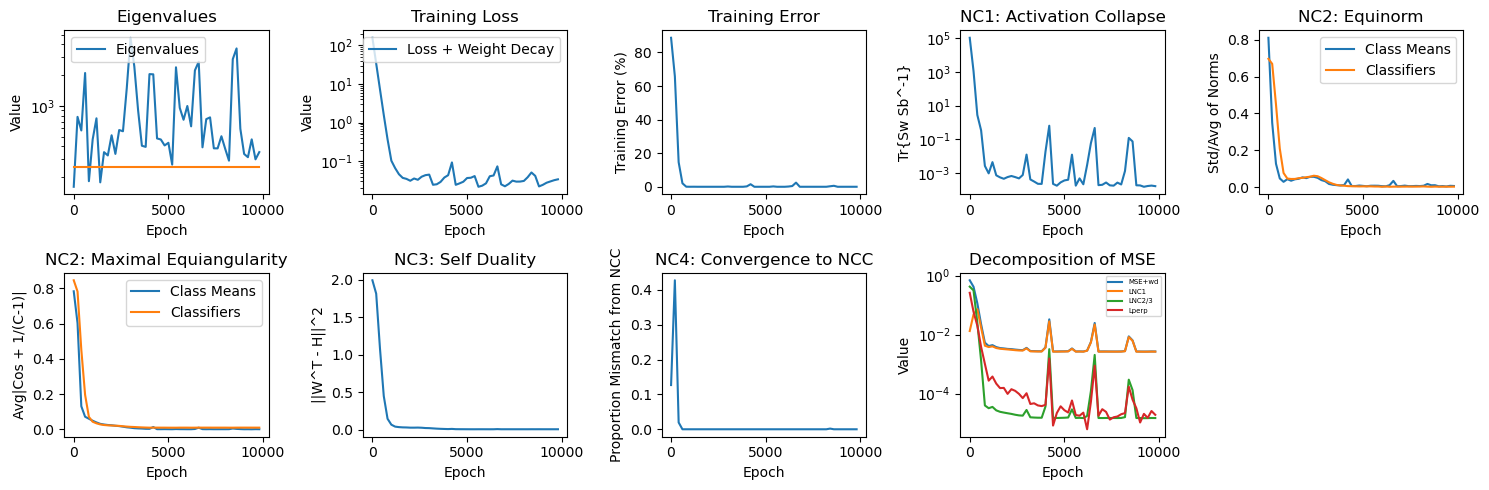

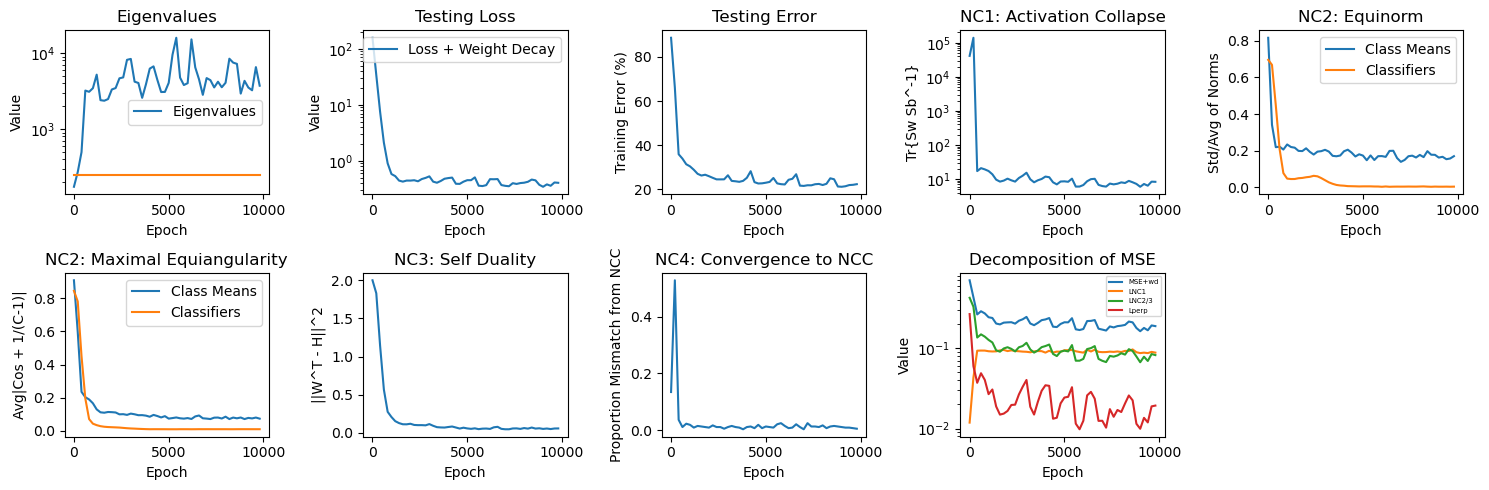

In [9]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.008, "cifar", "sgd", 0.005, 512, 10000 

directory = get_directory(lr, dataset_name, opt_name, weight_decay, batch_size, epochs)
with open(f'{directory}/train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures_loss_eigs(train_graphs, lr)
plot_figures_nc_train(train_graphs, lr)
plot_figures_nc_test(train_graphs, lr)

In [21]:
def plot_figures_nc_test_compare(lrs):
    plt.figure(figsize=(15,5))
    train_graphs = {}
    for lr in lrs:
        if lr != 0.001:
            epochs = 10000
        else:
            epochs = 40000
        directory = get_directory(lr, dataset_name, opt_name, weight_decay, batch_size, epochs)
        with open(f'{directory}/train_graphs.pk', 'rb') as f:
            train_graphs[lr] = pickle.load(f)

    plt.subplot(2,5,1)
    for lr in lrs:
        cur_epochs = train_graphs[lr].log_epochs
        plt.semilogy(cur_epochs, train_graphs[lr].eigs_test)
    #plt.semilogy(cur_epochs, np.ones_like(cur_epochs) * 2 / lr)
    plt.legend(['Eigenvalues'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Eigenvalues')

    plt.subplot(2,5,2)
    for lr in lrs:
        cur_epochs = train_graphs[lr].log_epochs
        plt.plot(cur_epochs, 100*(1 - np.array(train_graphs[lr].test_accuracy)))
    plt.xlabel('Epoch')
    plt.ylabel('Testing Error (%)')
    plt.title('Testing Error')

    plt.subplot(2,5,6)
    for lr in lrs:
        cur_epochs = train_graphs[lr].log_epochs
        plt.semilogy(cur_epochs, train_graphs[lr].test_Sw_invSb)
    plt.xlabel('Epoch')
    plt.ylabel('Tr{Sw Sb^-1}')
    plt.title('NC1: Activation Collapse')

    plt.subplot(2,5,7)
    for lr in lrs:
        cur_epochs = train_graphs[lr].log_epochs
        plt.plot(cur_epochs, train_graphs[lr].test_norm_M_CoV)
        #plt.plot(cur_epochs, train_graphs.test_norm_W_CoV)
        #plt.legend(['Class Means','Classifiers'])
    plt.xlabel('Epoch')
    plt.ylabel('Std/Avg of Norms')
    plt.title('NC2: Equinorm')

    plt.subplot(2,5,8)
    for lr in lrs:
        cur_epochs = train_graphs[lr].log_epochs
        plt.plot(cur_epochs, train_graphs[lr].test_cos_M)
    #plt.plot(cur_epochs, train_graphs.test_cos_W)
    #plt.legend(['Class Means','Classifiers'])
    plt.xlabel('Epoch')
    plt.ylabel('Avg|Cos + 1/(C-1)|')
    plt.title('NC2: Maximal Equiangularity')

    plt.subplot(2,5,9)
    for lr in lrs:
        cur_epochs = train_graphs[lr].log_epochs
        plt.plot(cur_epochs,train_graphs[lr].test_W_M_dist)
    plt.xlabel('Epoch')
    plt.ylabel('||W^T - H||^2')
    plt.title('NC3: Self Duality')
    plt.legend(lrs)


    plt.tight_layout()
    plt.show()

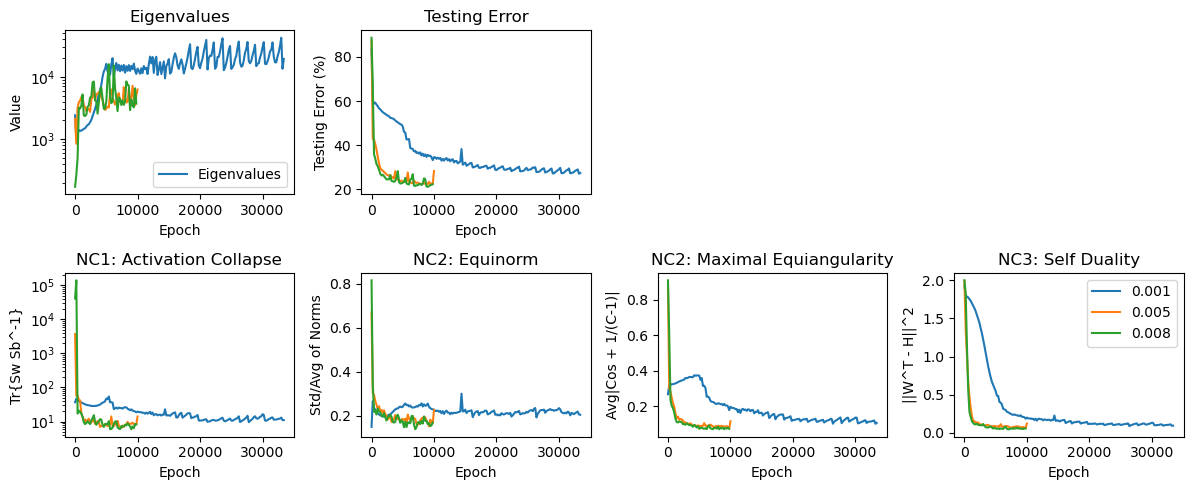

In [22]:
lrs = [0.001, 0.005, 0.008]
plot_figures_nc_test_compare(lrs)